In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

In [2]:
string_files = ['data/string_1.wav', 'data/string_2.wav', 'data/string_3.wav']

In [3]:
def get_peak_freq(sound_file, plot=False, window_size=-1):
    """
    Get the peak frequency of a sound file
    """
    spf = wave.open(sound_file, "r")
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, np.int16)
    fs = spf.getframerate()
    if spf.getnchannels() == 2:
        print("Just mono files")
        sys.exit(0)
    Time = np.linspace(0, len(signal) / fs, num=len(signal))

    # Applying FFT
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(Time.shape[-1], d=1/fs)
    amplitude = np.abs(fft_result)
    power = amplitude ** 2

    # Window sum the frequencies to get a better peak if the frequencies are dispersed
    if window_size > 0:
        window_power = np.convolve(power, np.ones(window_size), 'same')

    
    # Find the peak positive frequency
    if window_size > 0:
        peak_coefficient = np.argmax(window_power)
    else:
        peak_coefficient = np.argmax(power)
    peak_freq = abs(freq[peak_coefficient])
    print(f'Peak frequency of the note : {peak_freq:.2f} Hz')

    # Plotting the spectrum
    if plot:
        plt.figure(1)
        plt.title(f'FFT of {sound_file}')
        if window_size > 0:
            plt.plot(freq, window_power)
        else:
            plt.plot(freq, power)
        plt.xlim(0, 500)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')
        plt.show()
    return abs(peak_freq)

In [4]:
# Set the frequency of the notes of the strings of a guitar and the value of 1 cent for accuracy
guitare_note = {}
guitare_note['E1'] = (329.63, 0.15)
guitare_note['B2'] = (246.94, 0.15)
guitare_note['G3'] = (196.00, 0.15)
guitare_note['D4'] = (146.83, 0.08)
guitare_note['A5'] = (110.00, 0.08)
guitare_note['E6'] = (82.41, 0.04)


In [5]:
def get_string(sound_file, plot=False, window_size=-1):
    peak_freq = get_peak_freq(sound_file, plot=plot, window_size=window_size)
    accuracy_diff = -1
    for note, (freq, accuracy) in guitare_note.items():
        temp = abs(freq - peak_freq)/accuracy
        if temp < accuracy_diff or accuracy_diff == -1:
            accuracy_diff = temp
            string = note
    print(f'The string is : {string}')
    print(f'Accuracy : {accuracy_diff:.2f} cents')

Peak frequency of the note : 329.68 Hz


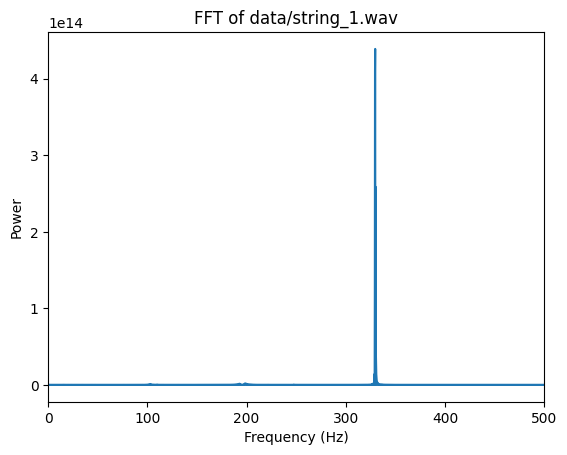

The string is : E1
Accuracy : 0.34 cents

Peak frequency of the note : 392.15 Hz


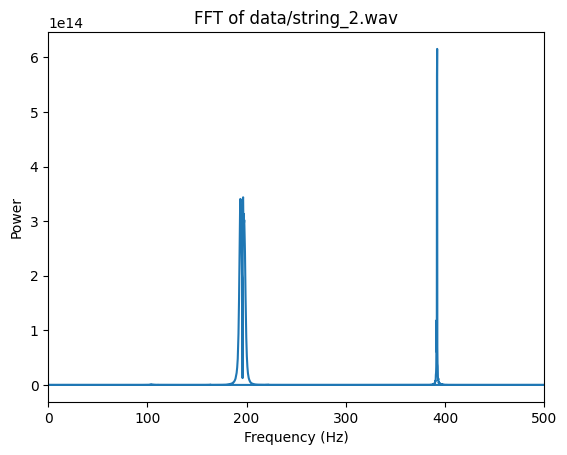

The string is : E1
Accuracy : 416.78 cents

Peak frequency of the note : 110.12 Hz


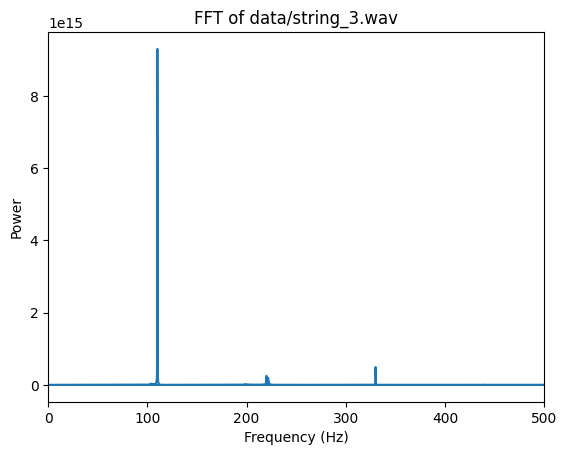

The string is : A5
Accuracy : 1.53 cents



In [6]:
for sound_file in string_files:
    get_string(sound_file, plot=True)
    print()

The first and last string seem to have coherent result. 

The peak frequency of the second string is too far from any possible correct note. This result is due to frequencies being distributed around a larger but lower peak around 200Hz. I will add the close frequencies to find other result.

Peak frequency of the note : 195.79 Hz


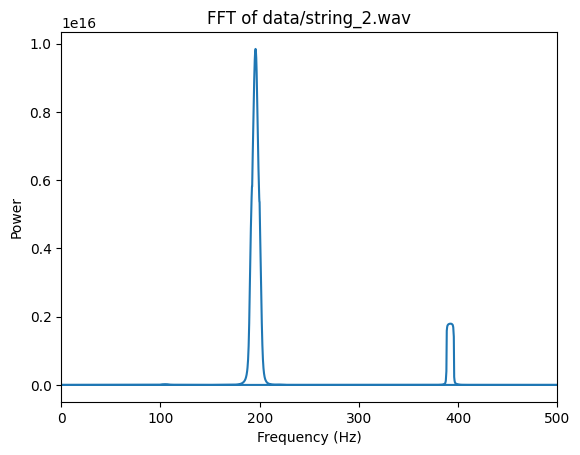

The string is : G3
Accuracy : 1.38 cents



In [7]:
get_string(string_files[1], plot=True, window_size=40)
print()

Final results:

In [8]:
get_string(string_files[0])
print()
get_string(string_files[1],window_size=40)
print()
get_string(string_files[2])

Peak frequency of the note : 329.68 Hz
The string is : E1
Accuracy : 0.34 cents

Peak frequency of the note : 195.79 Hz
The string is : G3
Accuracy : 1.38 cents

Peak frequency of the note : 110.12 Hz
The string is : A5
Accuracy : 1.53 cents
